# MIT Open Courseware - Computational & Systems Biology
## Problem Set 3

## P1 Gibbs Sampler

You are studying longevity in two species, A and B. A study was recently published showing 
that a transcription factor called AGE is involved in regulating many aging- and stress-related 
pathways in both species A and B. AGE is known to affect transcription by binding to the 
promoters of its target genes. You have a list of aging-related genes whose expression 
changed (as measured by RNA-seq) in age(-) mutants relative to wild-type in species A. From a 
similar experiment, you obtained a list of genes whose expression changed in age(-) in species 
B. You want to look at the promoters of these genes to see if you can find any enriched 
sequence motif that might be a recognition site for AGE. You have two lists of sequences – 
seqsA.fa contains the 30bp upstream from the AGE target genes in A, and seqsB.fa contains 
30bp upstream from the AGE target genes in B.

#### (A)

Run the Gibb's Sampler on Sequence A with motifWidth 7 algorithm several (~10) times and pick the highest scoring run. For 
that run, report the background distribution, final weight matrix, motif score and relative entropy
Plot the relative entropy of the motif after each iteration.

**I only run and plot once since the submissions is seperate from the notebook for the class**

What is the shape of this graph? What is the consensus motif?

Final weight matrix:
Pos	A	C	G	T
0	0.7564102564102564	0.02564102564102564	0.10256410256410256	0.11538461538461539
1	0.038461538461538464	0.11538461538461539	0.16666666666666666	0.6794871794871795
2	0.05128205128205128	0.8333333333333334	0.10256410256410256	0.01282051282051282
3	0.01282051282051282	0.01282051282051282	0.01282051282051282	0.9615384615384616
4	0.07692307692307693	0.8589743589743589	0.038461538461538464	0.02564102564102564
5	0.8846153846153846	0.02564102564102564	0.0641025641025641	0.02564102564102564
6	0.7948717948717948	0.10256410256410256	0.01282051282051282	0.08974358974358974
Motif score = 616.2212638414687
Final relative entropy = 7.263691242795153
Background Distribution: 
 {'A': 0.29777777777777775, 'C': 0.23466666666666666, 'G': 0.1791111111111111, 'T': 0.28844444444444445}


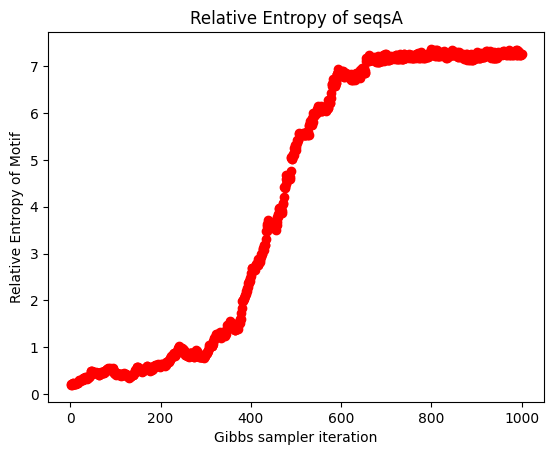

In [3]:
from gibbsSampler import gibbsSampler, printGibbsResults

fastaName = 'seqsA.fa'
motifWidth = 7
numIter= 1000

score = 0

for i in range(10):
    tempScore, tempWmat, tempSequences, tempBackground, tempRelEnt, tempRelative_entropy_list = gibbsSampler(fastaName, motifWidth, numIter)
    if tempScore > score:
        score, wmat, sequences, background, relEnt, relative_entropy_list = tempScore, tempWmat, tempSequences, tempBackground, tempRelEnt, tempRelative_entropy_list 

#print(relative_entropy_list)
printGibbsResults(wmat, sequences, background, relEnt, relative_entropy_list)

The graph is sigmoidal – this is expected for the Gibb's sampler where it starts searching at random and then has a rapid rise when it starts to randomly select more instances of the motif, followed by a plateau as we converge towards the motif. 

The consensus motif is ATCTCAA.

#### (B)

Weight matrices are not very visually informative for understanding a motif Sequence Logos are more human friendly. Create 3 sequence logos and compare the results of your various runs.

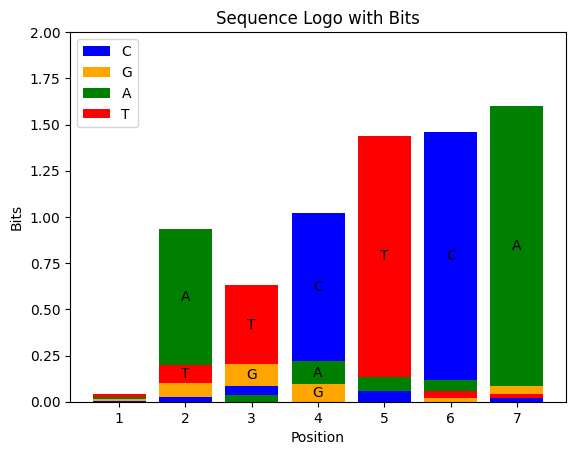

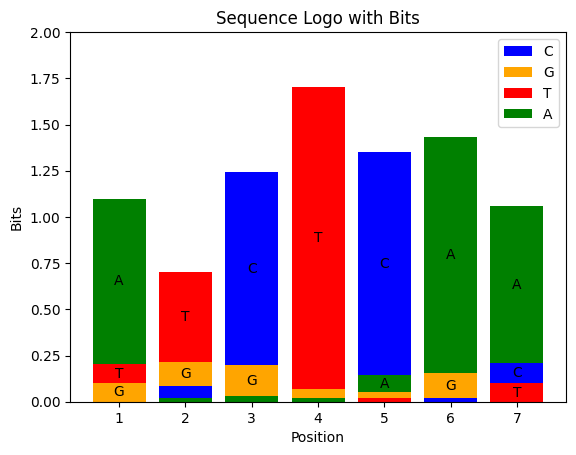

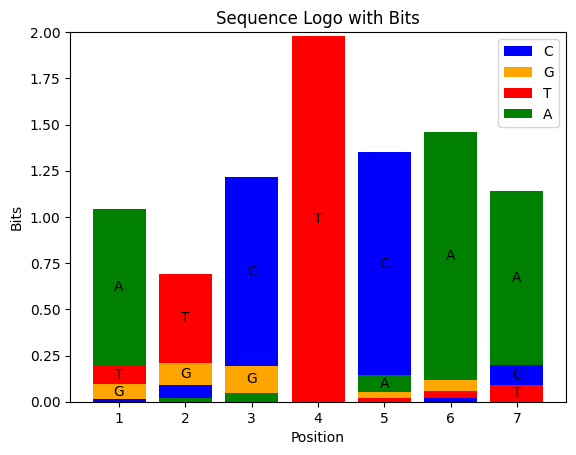

In [4]:
from createWebLogo import createWebLogo
from gibbsSampler import printToLogo, gibbsSampler

for i in range(3):
    createWebLogo(printToLogo(gibbsSampler(fastaName, motifWidth, numIter)[2]))

We see that two of the logos follow the census motiff and the one that doesn't is simply shifted by 1 which is common is markov methods.

#### (C)

We now want to look for motifs in species B. Run the algorithm for length 7 and seqsB.fa several times and report the background distribution, final weight matrix, motif score and relative entropy from a representative run. 
How does the relative entropy of the motif in species B compared to species A? Does this mean that the AGE motif is easier or harder to find in species B? Why?

Final weight matrix:
Pos	A	C	G	T
0	0.8333333333333334	0.05128205128205128	0.02564102564102564	0.08974358974358974
1	0.10256410256410256	0.07692307692307693	0.19230769230769232	0.6282051282051282
2	0.02564102564102564	0.8205128205128205	0.14102564102564102	0.01282051282051282
3	0.038461538461538464	0.038461538461538464	0.01282051282051282	0.9102564102564102
4	0.10256410256410256	0.8205128205128205	0.02564102564102564	0.05128205128205128
5	0.8974358974358975	0.038461538461538464	0.038461538461538464	0.02564102564102564
6	0.782051282051282	0.10256410256410256	0.01282051282051282	0.10256410256410256
Motif score = 792.5196476299172
Final relative entropy = 9.637787883215735
Background Distribution: 
 {'A': 0.16533333333333333, 'C': 0.35777777777777775, 'G': 0.34, 'T': 0.1368888888888889}


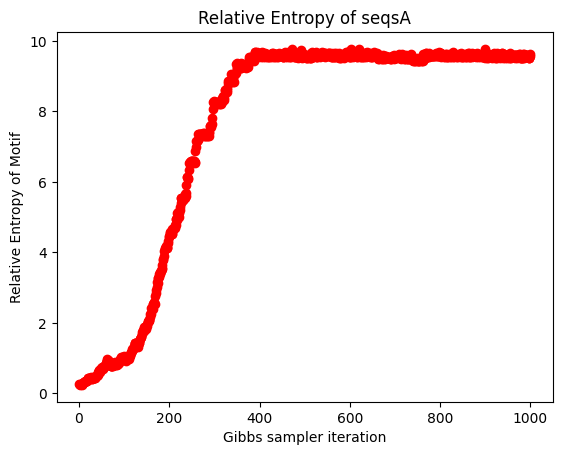

In [5]:
from gibbsSampler import gibbsSampler, printGibbsResults

fastaName = 'seqsB.fa'
motifWidth = 7
numIter= 1000

score = 0

for i in range(10):
    tempScore, tempWmat, tempSequences, tempBackground, tempRelEnt, tempRelative_entropy_list = gibbsSampler(fastaName, motifWidth, numIter)
    if tempScore > score:
        score, wmat, sequences, background, relEnt, relative_entropy_list = tempScore, tempWmat, tempSequences, tempBackground, tempRelEnt, tempRelative_entropy_list 

#print(relative_entropy_list)
printGibbsResults(wmat, sequences, background, relEnt, relative_entropy_list)

The motif was easier to find in species B because species B is G/C rich and the motiff we are finding is A/T rich. So the motiff sticks out more relative to the background resulting in the motif score and relative entropy being higher.

#### (D)
Assuming there was still one occurrence of the motif in every sequence, what 
would happen if we increased the lengths of the sequences we are searching through? Run your Gibbs sampler on seqsAext.fa, which contains sequences of length 90 instead of 30. Run it several times and plot the relative entropy as a function of the number of iterations for a high scoring run. How is this plot different from part (a)? Can you explain the difference?

Final weight matrix:
Pos	A	C	G	T
0	0.02564102564102564	0.0641025641025641	0.16666666666666666	0.7435897435897436
1	0.01282051282051282	0.8205128205128205	0.11538461538461539	0.05128205128205128
2	0.0641025641025641	0.01282051282051282	0.02564102564102564	0.8974358974358975
3	0.05128205128205128	0.8589743589743589	0.01282051282051282	0.07692307692307693
4	0.9230769230769231	0.02564102564102564	0.02564102564102564	0.02564102564102564
5	0.8076923076923077	0.08974358974358974	0.01282051282051282	0.08974358974358974
6	0.34615384615384615	0.2564102564102564	0.16666666666666666	0.23076923076923078
Motif score = 575.2509402380186
Final relative entropy = 6.776671803900518
Background Distribution: 
 {'A': 0.30607407407407405, 'C': 0.2034074074074074, 'G': 0.18725925925925926, 'T': 0.3032592592592593}


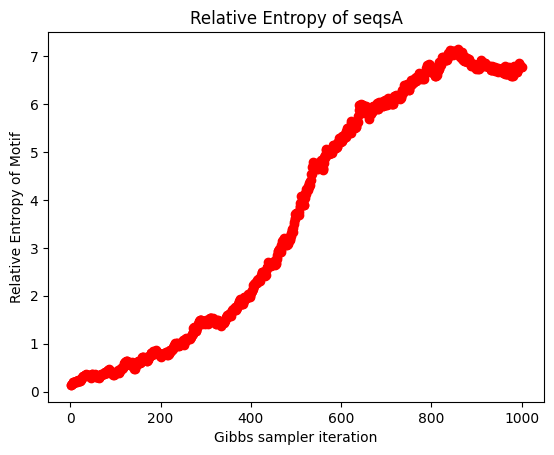

In [6]:
from gibbsSampler import gibbsSampler, printGibbsResults

fastaName = 'seqsAext.fa'
motifWidth = 7
numIter= 1000

score = 0

for i in range(10):
    tempScore, tempWmat, tempSequences, tempBackground, tempRelEnt, tempRelative_entropy_list = gibbsSampler(fastaName, motifWidth, numIter)
    if tempScore > score:
        score, wmat, sequences, background, relEnt, relative_entropy_list = tempScore, tempWmat, tempSequences, tempBackground, tempRelEnt, tempRelative_entropy_list 

#print(relative_entropy_list)
printGibbsResults(wmat, sequences, background, relEnt, relative_entropy_list)

We still see the sigmoidal shape but it is not as sudden as we see in part (a). This is due to the Gibb's Sampler taking longer to find and then converge onto the motiff in the longer read. If we were to increase the number of itterations we would still expect to see it converge to the consesus motiff we see in (A).

### P2. RNA secondary structure prediction

#### (A)

Use the Nussinov algorithm to find the secondary structure that maximizes the 
number of Watson-Crick base-pairs in the following RNA sequence: 
CGAGUCGGAGUC

In [3]:
from nussinov import nussinov

nussinov('CGAGUCGGAGUC', 0)

     C    G    A    G    U    C    G    G    A    G    U    C
C  0.0  1.0  1.0  1.0  2.0  2.0  3.0  3.0  3.0  3.0  4.0  5.0
G  1.0  0.0  0.0  0.0  1.0  2.0  2.0  2.0  2.0  2.0  3.0  4.0
A  1.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  2.0  2.0  3.0  4.0
G  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  2.0  2.0  2.0  3.0
U  2.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  2.0  3.0
C  2.0  2.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  3.0
G  3.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  2.0
G  3.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  2.0
A  3.0  2.0  2.0  2.0  2.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
G  3.0  2.0  2.0  2.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0
U  4.0  3.0  3.0  2.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0  0.0
C  5.0  4.0  4.0  3.0  3.0  3.0  2.0  2.0  1.0  1.0  0.0  0.0
(.....)((.))


### P3. Protein structure with PyRosetta

### (A)
Go to the Protein Data Bank (http://www.rcsb.org/pdb/home/home.do) and search 
for the protein we’ll be working with 1YY8. What is this molecule? By looking at the “3D View” tab of this protein, what is the predominant secondary structure (α-helix or β-sheet)